In [29]:
from PIL import Image
import pandas as pd
import os, os.path,time
import csv
import matplotlib.pyplot as plt
import numpy as np

In [40]:
Dimension = 64

In [41]:
fileList = []
def createFileList(myDir, format='.jpg'):
    
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

In [42]:
myFileList = createFileList('D:/age-and-gender-detection/testing')
print(myFileList)

D:/age-and-gender-detection/testing
['D:/age-and-gender-detection/testing\\25_1_first.jpg', 'D:/age-and-gender-detection/testing\\26_1_first.jpg', 'D:/age-and-gender-detection/testing\\30_1_first.jpg']


In [43]:
def split_file_name(filename):
    split_data = filename.split('_')
    split_data2 = split_data[2].split('.')
    return (split_data)

In [44]:
new_dict = {
    'age':[],
    'gender':[],
    'image_name':[],
    'pixels':[]
    }

df = pd.DataFrame(new_dict)
for en,file in enumerate(myFileList):
    img_file = Image.open(file)
    img_file = img_file.transpose(Image.FLIP_LEFT_RIGHT)
    img_file = img_file.resize((Dimension,Dimension))
    width, height = img_file.size
     
    print(type(en))
   
    head, tail = os.path.split(file)
    print(tail)
    split_data = split_file_name(tail) 
    print(split_data)

    format=img_file.format
    mode=img_file.mode

    img_grey = img_file.convert('L')
    
    value=np.asarray(img_grey.getdata(),dtype=np.int).reshape((img_grey.size[1],img_grey.size[0]))
 
    value=value.flatten()
    tostr = lambda x: [str(y) for y in x]
    
    name_array = ' '.join(tostr(value))
 
    df.loc[en] = [str(split_data[0]),str(split_data[1]),str(split_data[2]),name_array]
df.to_csv('../dataset/dataset2.csv',index=False)    

<class 'int'>
25_1_first.jpg
['25', '1', 'first.jpg']
<class 'int'>
26_1_first.jpg
['26', '1', 'first.jpg']
<class 'int'>
30_1_first.jpg
['30', '1', 'first.jpg']


# checking  image is fliped or not?
 

In [45]:
# data=pd.read_csv("../dataset/age_gender.csv")
data=pd.read_csv("../dataset/dataset2.csv")
data.head()

,age,gender,image_name,pixels
0,25,1,first.jpg,125 122 106 94 93 92 97 97 98 93 86 80 88 95 1...
1,26,1,first.jpg,107 66 48 58 48 37 42 44 47 65 91 120 133 148 ...
2,30,1,first.jpg,67 64 64 66 68 72 72 65 61 61 60 65 70 73 79 8...


In [46]:
#convert pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
data.head()

,age,gender,image_name,pixels
0,25,1,first.jpg,"[125.0, 122.0, 106.0, 94.0, 93.0, 92.0, 97.0, ..."
1,26,1,first.jpg,"[107.0, 66.0, 48.0, 58.0, 48.0, 37.0, 42.0, 44..."
2,30,1,first.jpg,"[67.0, 64.0, 64.0, 66.0, 68.0, 72.0, 72.0, 65...."


In [47]:
X = np.array(data['pixels'].tolist())
print(X)

[[125. 122. 106. ...  31.  28.  25.]
 [107.  66.  48. ... 137. 169. 224.]
 [ 67.  64.  64. ...  58.  71.  72.]]


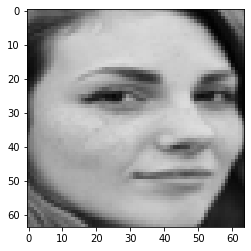

In [48]:
data = np.reshape(X[0], (Dimension, Dimension))
data = Image.fromarray(data)
imgg = plt.imshow(data)
plt.show(imgg)